In [40]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
train_data = 'data/train'
test_data = 'data/test'

In [42]:
def one_hot_label(label):
    if label=='1':
        ohl = np.array([1,0])
    elif label == '0':
        ohl = np.array([0,1])
    return ohl 

In [43]:
def train_data_with_labels():
    train_images = []
    for dir in os.listdir('data/train'):
        label=str(dir)
        print(label)
        dir = os.path.join(os.getcwd(),os.path.join('data/train',dir))
        for img in os.listdir(dir):
            path = os.path.join(dir,img)
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (28,28))
            train_images.append([np.array(img), one_hot_label(label)])
    shuffle(train_images)
    return train_images        

In [44]:
def test_data_with_labels():
    test_images = []
    for dir in os.listdir('data/test'):
        label=str(dir)
        print(label)
        dir = os.path.join(os.getcwd(),os.path.join('data/test',dir))
        for img in os.listdir(dir):
            path = os.path.join(dir,img)
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (28,28))
            test_images.append([np.array(img), one_hot_label(label)])
    shuffle(test_images)
    return test_images        

In [45]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *

In [46]:
training_images = train_data_with_labels()
testing_images = test_data_with_labels()
tr_img_data = np.array([i[0] for i in training_images]).reshape(-1,28,28,1)
tr_lbl_data = np.array([i[1] for i in training_images])
tst_img_data = np.array([i[0] for i in testing_images]).reshape(-1,28,28,1)
tst_lbl_data = np.array([i[1] for i in testing_images])

0
1
0
1


In [47]:
model = Sequential()

model.add(InputLayer(input_shape=[28,28,1]))
model.add(Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=5, padding='same', dim_ordering="th"))

model.add(Conv2D(filters=50, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=5, padding='same', dim_ordering="th"))

model.add(Conv2D(filters=80, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=5, padding='same', dim_ordering="th"))

model.add(Dropout(0.25))
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(2, activation='softmax'))
optimizer = Adam(lr=1e-3)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=tr_img_data, y= tr_lbl_data, epochs=50, batch_size=100)
model.summary()

/home/vishnoitanuj/miniconda3/envs/CV/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(data_format="channels_first", pool_size=5, padding="same")`
  """
/home/vishnoitanuj/miniconda3/envs/CV/lib/python3.5/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(data_format="channels_first", pool_size=5, padding="same")`
  
/home/vishnoitanuj/miniconda3/envs/CV/lib/python3.5/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(data_format="channels_first", pool_size=5, padding="same")`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/50
482/482 [==============================] - 3s 6ms/step - loss: 6.8482 - acc: 0.5290
Epoch 2/50
482/482 [==============================] - 0s 412us/step - loss: 4.1570 - acc: 0.6784
Epoch 3/50
482/482 [==============================] - 0s 413us/step - loss: 4.0393 - acc: 0.6805
Epoch 4/50
482/482 [==============================] - 0s 416us/step - loss: 2.0897 - acc: 0.8071
Epoch 5/50
482/482 [==============================] - 0s 405us/step - loss: 1.0754 - acc: 0.9108
Epoch 6/50
482/482 [==============================] - 0s 421us/step - loss: 0.4615 - acc: 0.9419
Epoch 7/50
482/482 [==============================] - 0s 415us/step - loss: 0.3472 - acc: 0.9544
Epoch 8/50
482/482 [==============================] - 0s 414us/step - loss: 0.2395 - acc: 0.9668
Epoch 9/50
482/482 [==============================] - 0s 411us/step - loss: 0.1305 - acc: 0.9793
Epoch 10/50
482/482 [==============================] - 0s 407us/step - loss: 0.0860 - acc: 0.9834
Epoch 11/50
482/482 [==========

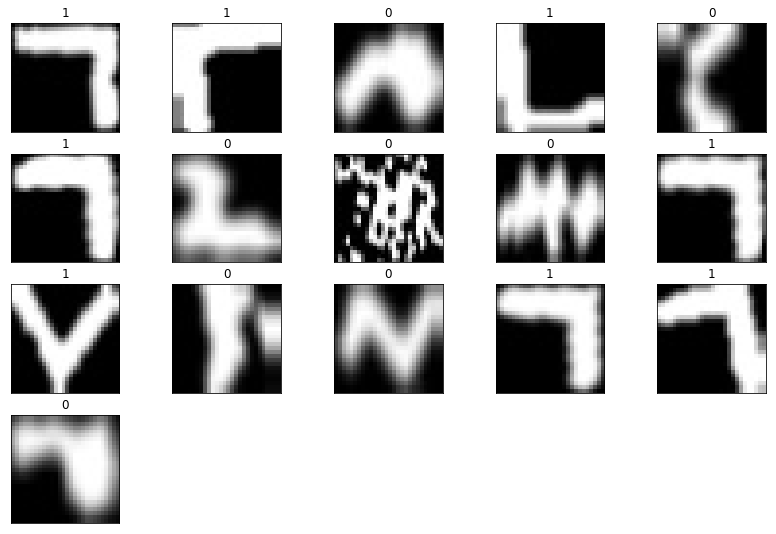

In [48]:
fig = plt.figure(figsize=(14,14))

for cnt, data in enumerate(testing_images[0:]):
    y = fig.add_subplot(6,5, cnt+1)
    img = data[0]
    data = img.reshape(1,28,28,1)
    model_out = model.predict([data])
    
    if np.argmax(model_out)==1:
        str_label = '0'
    else:
        str_label = '1'
        
    y.imshow(img, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

In [50]:
model.save('happy.h5')

In [ ]:
del model

In [51]:
from image_process import (
    threshold,
    morphology,
    find_contours,
    extra_contour_elimination,
    crop_contour,
    req_contour
)
import csv
import os
import cv2
import numpy as np

In [96]:
def plot(img):
    img = cv2.imread('CV-Assignment-Dataset/DJI_0036.JPG')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    clone = img.copy()
    thresh = threshold(img)
    img, lines = find_contours(thresh)
    final_lines = extra_contour_elimination(lines)
    req = []
    for i,line in enumerate(final_lines):
        L = crop_contour(line,thresh)
        img = cv2.resize(L,(28,28))
        data = img.reshape(1,28,28,1)
        model_out = model.predict([data])

        if np.argmax(model_out)==1:
            str_label = '0'
        else:
            str_label = '1'

        if str_label=='1':
            print(str_label)
            req.append(i)
            cv2.imwrite('test_images/test.jpeg',L)

    for index in req:
        rect = cv2.minAreaRect(final_lines[index])
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.drawContours(clone,[box],0,(0,0,0),1)
        cv2.imwrite("test_images/tested.jpeg",clone)